In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

# train = 1-6 분기
# test = 2-7 분기

In [3]:
from sklearn.metrics import mean_squared_log_error

def get_rmsle(model):
    pred = model.predict(X_test)
    pred = np.expm1(pred)
    y_test_exp = np.expm1(y_test)
    rmsle = np.sqrt(mean_squared_log_error(y_test_exp, pred))
    print(f'{model.__class__.__name__} RMSLE: {np.round(rmsle,3)}')
    return rmsle

def get_rmsles(models):
    rmsles = []
    for model in models:
        rmsle = get_rmsle(model)
        rmsles.append(rmsle)
    return rmsles

In [4]:
import pandas as pd

traindata = pd.read_pickle('../dataset/traindata.pkl')
testdata = pd.read_pickle('../dataset/testdata.pkl')

In [5]:
traindata.head(3)

,성별,연령대,거주지역,선호제휴점포,가공변화율,가공순증감률,신선변화율,신선순증감률,일상변화율,일상순증감률,의약변화율,의약순증감률,교육변화율,교육순증감률,디지털변화율,디지털순증감률,가구변화율,가구순증감률,의류변화율,의류순증감률,전문스포츠변화율,전문스포츠순증감률,패션변화율,패션순증감률,명품변화율,명품순증감률,기타변화율,기타순증감률,종합변화율,종합순증감률,R rank,F rank,M rank,Label
0,F,노년층,부산,A29,10,2,1,-1,9,-1,1,-1,3,-1,0,0,7,1,7,1,3,-1,11,-3,3,-1,15,1,0,0,9,4,8,66.22
1,F,노년층,서울,A2,13,1,7,1,16,0,3,-3,0,0,5,1,4,0,7,3,4,0,0,0,1,-1,15,1,4,0,5,4,10,181.64
2,F,노년층,서울,B7,7,1,9,-3,14,2,1,-1,2,0,0,0,2,0,5,-3,5,1,8,-2,1,-1,9,-1,7,1,1,8,5,124.31


In [6]:
testdata.head(3)

,성별,연령대,거주지역,선호제휴점포,가공변화율,가공순증감률,신선변화율,신선순증감률,일상변화율,일상순증감률,의약변화율,의약순증감률,교육변화율,교육순증감률,디지털변화율,디지털순증감률,가구변화율,가구순증감률,의류변화율,의류순증감률,전문스포츠변화율,전문스포츠순증감률,패션변화율,패션순증감률,명품변화율,명품순증감률,기타변화율,기타순증감률,종합변화율,종합순증감률,R rank,F rank,M rank,Label
0,F,노년층,부산,A29,11,1,1,-1,9,-1,1,0,3,0,0,0,8,0,8,-1,5,1,11,2,4,-1,18,5,1,-1,1,4,8,173.76
1,F,노년층,서울,A2,16,4,7,4,16,7,3,0,0,0,6,2,5,0,7,1,4,2,3,0,2,0,18,5,3,1,9,4,10,114.58
2,F,노년층,서울,B7,7,2,9,2,18,-2,1,0,2,-1,0,0,2,0,9,1,7,-2,10,-2,1,0,9,-4,7,1,5,8,5,65.52


In [7]:
testdata['Label'].describe()

count    18866.000000
mean       166.157991
std        784.027610
min          0.030000
25%         70.950000
50%        102.700000
75%        155.310000
max      69679.300000
Name: Label, dtype: float64

In [8]:
traindata['Label'].describe()

count    18866.000000
mean       170.165297
std       1079.332555
min          0.070000
25%         72.312500
50%        105.765000
75%        152.520000
max      84700.000000
Name: Label, dtype: float64

<AxesSubplot:xlabel='Label', ylabel='Count'>

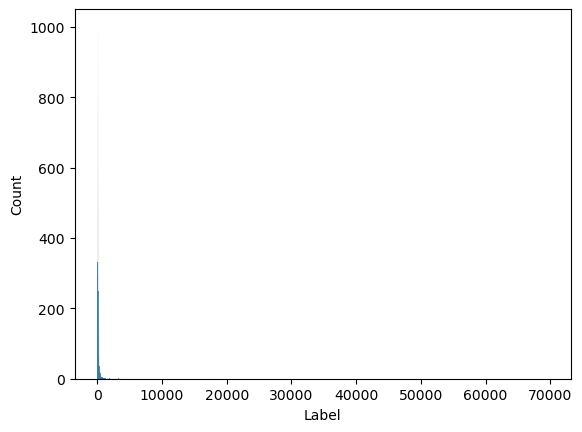

In [9]:
import seaborn as sns
sns.histplot(data=testdata['Label'])

<AxesSubplot:xlabel='Label', ylabel='Count'>

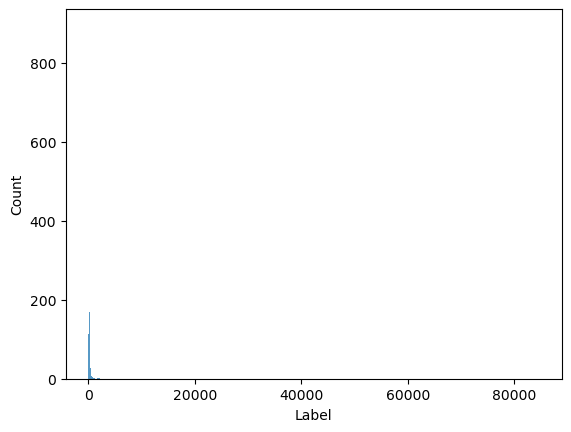

In [10]:
sns.histplot(data=traindata['Label'])

In [11]:
# 분포 -> 로그변환
import numpy as np
traindata['Label'] = np.log1p(traindata['Label'])
testdata['Label'] = np.log1p(testdata['Label'])

<AxesSubplot:xlabel='Label', ylabel='Count'>

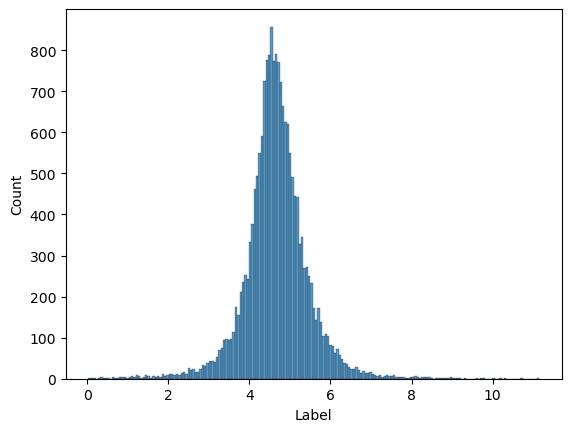

In [12]:
sns.histplot(data=testdata['Label'])

<AxesSubplot:xlabel='Label', ylabel='Count'>

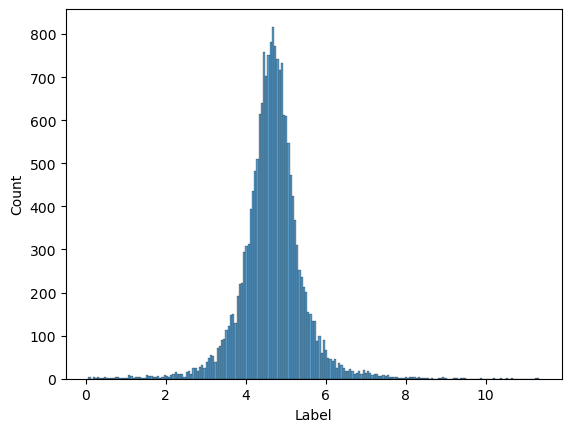

In [13]:
sns.histplot(data=traindata['Label'])

In [14]:
traindata.head(3)

,성별,연령대,거주지역,선호제휴점포,가공변화율,가공순증감률,신선변화율,신선순증감률,일상변화율,일상순증감률,의약변화율,의약순증감률,교육변화율,교육순증감률,디지털변화율,디지털순증감률,가구변화율,가구순증감률,의류변화율,의류순증감률,전문스포츠변화율,전문스포츠순증감률,패션변화율,패션순증감률,명품변화율,명품순증감률,기타변화율,기타순증감률,종합변화율,종합순증감률,R rank,F rank,M rank,Label
0,F,노년층,부산,A29,10,2,1,-1,9,-1,1,-1,3,-1,0,0,7,1,7,1,3,-1,11,-3,3,-1,15,1,0,0,9,4,8,4.207971
1,F,노년층,서울,A2,13,1,7,1,16,0,3,-3,0,0,5,1,4,0,7,3,4,0,0,0,1,-1,15,1,4,0,5,4,10,5.207517
2,F,노년층,서울,B7,7,1,9,-3,14,2,1,-1,2,0,0,0,2,0,5,-3,5,1,8,-2,1,-1,9,-1,7,1,1,8,5,4.830791


In [15]:
testdata.head(3)

,성별,연령대,거주지역,선호제휴점포,가공변화율,가공순증감률,신선변화율,신선순증감률,일상변화율,일상순증감률,의약변화율,의약순증감률,교육변화율,교육순증감률,디지털변화율,디지털순증감률,가구변화율,가구순증감률,의류변화율,의류순증감률,전문스포츠변화율,전문스포츠순증감률,패션변화율,패션순증감률,명품변화율,명품순증감률,기타변화율,기타순증감률,종합변화율,종합순증감률,R rank,F rank,M rank,Label
0,F,노년층,부산,A29,11,1,1,-1,9,-1,1,0,3,0,0,0,8,0,8,-1,5,1,11,2,4,-1,18,5,1,-1,1,4,8,5.163414
1,F,노년층,서울,A2,16,4,7,4,16,7,3,0,0,0,6,2,5,0,7,1,4,2,3,0,2,0,18,5,3,1,9,4,10,4.749963
2,F,노년층,서울,B7,7,2,9,2,18,-2,1,0,2,-1,0,0,2,0,9,1,7,-2,10,-2,1,0,9,-4,7,1,5,8,5,4.197503


In [16]:
# 머신러닝 -> 원핫인코딩 필수
train_ohe = pd.get_dummies(traindata)
test_ohe = pd.get_dummies(testdata)

In [17]:
train_ohe.head(3)

,가공변화율,가공순증감률,신선변화율,신선순증감률,일상변화율,일상순증감률,의약변화율,의약순증감률,교육변화율,교육순증감률,디지털변화율,디지털순증감률,가구변화율,가구순증감률,의류변화율,의류순증감률,전문스포츠변화율,전문스포츠순증감률,패션변화율,패션순증감률,명품변화율,명품순증감률,기타변화율,기타순증감률,종합변화율,종합순증감률,R rank,F rank,M rank,Label,성별_F,성별_M,연령대_노년층,연령대_장년층,연령대_중년층,연령대_청년층,연령대_학생층,거주지역_강원,거주지역_경남,거주지역_경북,거주지역_광주,거주지역_대구,거주지역_대전,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_울산,거주지역_인천,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북,선호제휴점포_A1,선호제휴점포_A10,선호제휴점포_A11,선호제휴점포_A12,선호제휴점포_A13,선호제휴점포_A14,선호제휴점포_A15,선호제휴점포_A16,선호제휴점포_A17,선호제휴점포_A18,선호제휴점포_A19,선호제휴점포_A2,선호제휴점포_A20,선호제휴점포_A21,선호제휴점포_A22,선호제휴점포_A23,선호제휴점포_A24,선호제휴점포_A25,선호제휴점포_A26,선호제휴점포_A27,선호제휴점포_A28,선호제휴점포_A29,선호제휴점포_A3,선호제휴점포_A30,선호제휴점포_A31,선호제휴점포_A32,선호제휴점포_A34,선호제휴점포_A35,선호제휴점포_A36,선호제휴점포_A37,선호제휴점포_A39,선호제휴점포_A4,선호제휴점포_A40,선호제휴점포_A41,선호제휴점포_A42,선호제휴점포_A44,선호제휴점포_A45,선호제휴점포_A47,선호제휴점포_A48,선호제휴점포_A5,선호제휴점포_A6,선호제휴점포_A7,선호제휴점포_A8,선호제휴점포_A9,선호제휴점포_B1,선호제휴점포_B10,선호제휴점포_B100,선호제휴점포_B101,선호제휴점포_B102,선호제휴점포_B104,선호제휴점포_B105,선호제휴점포_B106,선호제휴점포_B107,선호제휴점포_B108,선호제휴점포_B109,선호제휴점포_B11,선호제휴점포_B110,선호제휴점포_B111,선호제휴점포_B112,선호제휴점포_B113,선호제휴점포_B114,선호제휴점포_B115,선호제휴점포_B116,선호제휴점포_B117,선호제휴점포_B118,선호제휴점포_B119,선호제휴점포_B12,선호제휴점포_B120,선호제휴점포_B121,선호제휴점포_B122,선호제휴점포_B123,선호제휴점포_B125,선호제휴점포_B126,선호제휴점포_B127,선호제휴점포_B128,선호제휴점포_B13,선호제휴점포_B133,선호제휴점포_B14,선호제휴점포_B15,선호제휴점포_B16,선호제휴점포_B18,선호제휴점포_B19,선호제휴점포_B2,선호제휴점포_B20,선호제휴점포_B21,선호제휴점포_B22,선호제휴점포_B23,선호제휴점포_B24,선호제휴점포_B25,선호제휴점포_B26,선호제휴점포_B27,선호제휴점포_B28,선호제휴점포_B29,선호제휴점포_B3,선호제휴점포_B30,선호제휴점포_B31,선호제휴점포_B32,선호제휴점포_B33,선호제휴점포_B34,선호제휴점포_B35,선호제휴점포_B36,선호제휴점포_B37,선호제휴점포_B38,선호제휴점포_B39,선호제휴점포_B4,선호제휴점포_B40,선호제휴점포_B41,선호제휴점포_B42,선호제휴점포_B43,선호제휴점포_B44,선호제휴점포_B45,선호제휴점포_B46,선호제휴점포_B47,선호제휴점포_B48,선호제휴점포_B49,선호제휴점포_B5,선호제휴점포_B50,선호제휴점포_B51,선호제휴점포_B52,선호제휴점포_B53,선호제휴점포_B54,선호제휴점포_B55,선호제휴점포_B56,선호제휴점포_B57,선호제휴점포_B58,선호제휴점포_B59,선호제휴점포_B6,선호제휴점포_B60,선호제휴점포_B65,선호제휴점포_B66,선호제휴점포_B67,선호제휴점포_B68,선호제휴점포_B69,선호제휴점포_B7,선호제휴점포_B70,선호제휴점포_B71,선호제휴점포_B72,선호제휴점포_B73,선호제휴점포_B74,선호제휴점포_B75,선호제휴점포_B76,선호제휴점포_B77,선호제휴점포_B78,선호제휴점포_B79,선호제휴점포_B8,선호제휴점포_B80,선호제휴점포_B82,선호제휴점포_B83,선호제휴점포_B84,선호제휴점포_B85,선호제휴점포_B86,선호제휴점포_B87,선호제휴점포_B88,선호제휴점포_B89,선호제휴점포_B9,선호제휴점포_B90,선호제휴점포_B91,선호제휴점포_B92,선호제휴점포_B93,선호제휴점포_B94,선호제휴점포_B95,선호제휴점포_B96,선호제휴점포_B97,선호제휴점포_B98,선호제휴점포_B99,선호제휴점포_C1,선호제휴점포_C10,선호제휴점포_C100,선호제휴점포_C101,선호제휴점포_C102,선호제휴점포_C103,선호제휴점포_C104,선호제휴점포_C105,선호제휴점포_C107,선호제휴점포_C108,선호제휴점포_C109,선호제휴점포_C11,선호제휴점포_C110,선호제휴점포_C111,선호제휴점포_C112,선호제휴점포_C113,선호제휴점포_C114,선호제휴점포_C115,선호제휴점포_C116,선호제휴점포_C118,선호제휴점포_C119,선호제휴점포_C12,선호제휴점포_C120,선호제휴점포_C121,선호제휴점포_C122,선호제휴점포_C123,선호제휴점포_C124,선호제휴점포_C125,선호제휴점포_C126,선호제휴점포_C127,선호제휴점포_C128,선호제휴점포_C129,선호제휴점포_C13,선호제휴점포_C130,선호제휴점포_C131,선호제휴점포_C132,선호제휴점포_C133,선호제휴점포_C134,선호제휴점포_C136,선호제휴점포_C138,선호제휴점포_C139,선호제휴점포_C14,선호제휴점포_C140,선호제휴점포_C141,선호제휴점포_C142,선호제휴점포_C143,선호제휴점포_C144,선호제휴점포_C145,선호제휴점포_C146,선호제휴점포_C147,선호제휴점포_C148,선호제휴점포_C149,선호제휴점포_C15,선호제휴점포_C150,선호제휴점포_C151,선호제휴점포_C152,선호제휴점포_C153,선호제휴점포_C154,선호제휴점포_C155,선호제휴점포_C156,선호제휴점포_C158,선호제휴점포_C159,선호제휴점포_C16,선호제휴점포_C160,선호제휴점포_C162,선호제휴점포_C163,선호제휴점포_C164,선호제휴점포_C165,선호제휴점포_C166,선호제휴점포_C167,선호제휴점포_C168,선호제휴점포_C169,선호제휴점포_C17,선호제휴점포_C170,선호제휴점포_C171,선호제휴점포_C173,선호제휴점포_C174,선호제휴점포_C175,선호제휴점포_C176,선호제휴점포_C177,선호제휴점포_C178,선호제휴점포_C179,선호제휴점포_C18,선호제휴점포_C180,선호제휴점포_C181,선호제휴점포_C182,선호제휴점포_C183,선호제휴점포_C184,선호제휴점포_C185,선호제휴점포_C186,선호제휴점포_C187,선호제휴점포_C188,선호제휴점포_C189,선호제휴점포_C19,선호제휴점포_C190,선호제휴점포_C191,선호제휴점포_C192,선호제휴점포_C193,선호제휴점포_C194,선호제휴점포_C195,선호제휴점포_C196,선호제휴점포_C197,선호제휴점포_C198,선호제휴점포_C199,선호제휴점포_C2,선호제휴점포_C20,선호제휴점포_C200,선호제휴점포_C202,선호제휴점포_C203,선호제휴점포_C205,선호제휴점포_C206,선호제휴점포_C207,선호제휴점포_C208,선호제휴점포_C209,선호제휴점포_C21,선호제휴점포_C210,선호제휴점포_C211,선호제휴점포_C212,선호제휴점포_C213,선호제휴점포_C214,선호제휴점포_C215,선호제휴점포_C217,선호제휴점포_C218,선호제휴점포_C219,선호제휴점포_C22,선호제휴점포_C220,선호제휴점포_C221,선호제휴점포_C222,선호제휴점포_C223,선호제휴점포_C224,선호제휴점포_C225,선호제휴점포_C226,선호제휴점포_C227,선호제휴점포_C228,선호제휴점포_C229,선호제휴점포_C23,선호제휴점포_C230,선호제휴점포_C231,선호제휴점포_C232,선호제휴점포_C233,선호제휴점포_C234,선호제휴점포_C235,선호제휴점포_C236,선호제휴점포_C237,선호제휴점포_C238,선호제휴점포_C239,선호제휴점포_C24,선호제휴점포_C240,선호제휴점포_C241,선호제휴점포_C243,선호제휴점포_C244

In [18]:
test_ohe.head(3)

,가공변화율,가공순증감률,신선변화율,신선순증감률,일상변화율,일상순증감률,의약변화율,의약순증감률,교육변화율,교육순증감률,디지털변화율,디지털순증감률,가구변화율,가구순증감률,의류변화율,의류순증감률,전문스포츠변화율,전문스포츠순증감률,패션변화율,패션순증감률,명품변화율,명품순증감률,기타변화율,기타순증감률,종합변화율,종합순증감률,R rank,F rank,M rank,Label,성별_F,성별_M,연령대_노년층,연령대_장년층,연령대_중년층,연령대_청년층,연령대_학생층,거주지역_강원,거주지역_경남,거주지역_경북,거주지역_광주,거주지역_대구,거주지역_대전,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_울산,거주지역_인천,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북,선호제휴점포_A1,선호제휴점포_A10,선호제휴점포_A11,선호제휴점포_A12,선호제휴점포_A13,선호제휴점포_A14,선호제휴점포_A15,선호제휴점포_A16,선호제휴점포_A17,선호제휴점포_A18,선호제휴점포_A19,선호제휴점포_A2,선호제휴점포_A20,선호제휴점포_A21,선호제휴점포_A22,선호제휴점포_A23,선호제휴점포_A24,선호제휴점포_A25,선호제휴점포_A26,선호제휴점포_A27,선호제휴점포_A28,선호제휴점포_A29,선호제휴점포_A3,선호제휴점포_A30,선호제휴점포_A31,선호제휴점포_A32,선호제휴점포_A34,선호제휴점포_A35,선호제휴점포_A36,선호제휴점포_A37,선호제휴점포_A39,선호제휴점포_A4,선호제휴점포_A40,선호제휴점포_A41,선호제휴점포_A42,선호제휴점포_A44,선호제휴점포_A45,선호제휴점포_A47,선호제휴점포_A48,선호제휴점포_A5,선호제휴점포_A6,선호제휴점포_A7,선호제휴점포_A8,선호제휴점포_A9,선호제휴점포_B1,선호제휴점포_B10,선호제휴점포_B100,선호제휴점포_B101,선호제휴점포_B102,선호제휴점포_B104,선호제휴점포_B105,선호제휴점포_B106,선호제휴점포_B107,선호제휴점포_B108,선호제휴점포_B109,선호제휴점포_B11,선호제휴점포_B110,선호제휴점포_B111,선호제휴점포_B112,선호제휴점포_B113,선호제휴점포_B114,선호제휴점포_B115,선호제휴점포_B116,선호제휴점포_B117,선호제휴점포_B118,선호제휴점포_B119,선호제휴점포_B12,선호제휴점포_B120,선호제휴점포_B121,선호제휴점포_B122,선호제휴점포_B123,선호제휴점포_B125,선호제휴점포_B126,선호제휴점포_B127,선호제휴점포_B128,선호제휴점포_B13,선호제휴점포_B133,선호제휴점포_B14,선호제휴점포_B15,선호제휴점포_B16,선호제휴점포_B18,선호제휴점포_B19,선호제휴점포_B2,선호제휴점포_B20,선호제휴점포_B21,선호제휴점포_B22,선호제휴점포_B23,선호제휴점포_B24,선호제휴점포_B25,선호제휴점포_B26,선호제휴점포_B27,선호제휴점포_B28,선호제휴점포_B29,선호제휴점포_B3,선호제휴점포_B30,선호제휴점포_B31,선호제휴점포_B32,선호제휴점포_B33,선호제휴점포_B34,선호제휴점포_B35,선호제휴점포_B36,선호제휴점포_B37,선호제휴점포_B38,선호제휴점포_B39,선호제휴점포_B4,선호제휴점포_B40,선호제휴점포_B41,선호제휴점포_B42,선호제휴점포_B43,선호제휴점포_B44,선호제휴점포_B45,선호제휴점포_B46,선호제휴점포_B47,선호제휴점포_B48,선호제휴점포_B49,선호제휴점포_B5,선호제휴점포_B50,선호제휴점포_B51,선호제휴점포_B52,선호제휴점포_B53,선호제휴점포_B54,선호제휴점포_B55,선호제휴점포_B56,선호제휴점포_B57,선호제휴점포_B58,선호제휴점포_B59,선호제휴점포_B6,선호제휴점포_B60,선호제휴점포_B65,선호제휴점포_B66,선호제휴점포_B67,선호제휴점포_B68,선호제휴점포_B69,선호제휴점포_B7,선호제휴점포_B70,선호제휴점포_B71,선호제휴점포_B72,선호제휴점포_B73,선호제휴점포_B74,선호제휴점포_B75,선호제휴점포_B76,선호제휴점포_B77,선호제휴점포_B78,선호제휴점포_B79,선호제휴점포_B8,선호제휴점포_B80,선호제휴점포_B82,선호제휴점포_B83,선호제휴점포_B84,선호제휴점포_B85,선호제휴점포_B86,선호제휴점포_B87,선호제휴점포_B88,선호제휴점포_B89,선호제휴점포_B9,선호제휴점포_B90,선호제휴점포_B91,선호제휴점포_B92,선호제휴점포_B93,선호제휴점포_B94,선호제휴점포_B95,선호제휴점포_B96,선호제휴점포_B97,선호제휴점포_B98,선호제휴점포_B99,선호제휴점포_C1,선호제휴점포_C10,선호제휴점포_C100,선호제휴점포_C101,선호제휴점포_C102,선호제휴점포_C103,선호제휴점포_C104,선호제휴점포_C105,선호제휴점포_C107,선호제휴점포_C108,선호제휴점포_C109,선호제휴점포_C11,선호제휴점포_C110,선호제휴점포_C111,선호제휴점포_C112,선호제휴점포_C113,선호제휴점포_C114,선호제휴점포_C115,선호제휴점포_C116,선호제휴점포_C118,선호제휴점포_C119,선호제휴점포_C12,선호제휴점포_C120,선호제휴점포_C121,선호제휴점포_C122,선호제휴점포_C123,선호제휴점포_C124,선호제휴점포_C125,선호제휴점포_C126,선호제휴점포_C127,선호제휴점포_C128,선호제휴점포_C129,선호제휴점포_C13,선호제휴점포_C130,선호제휴점포_C131,선호제휴점포_C132,선호제휴점포_C133,선호제휴점포_C134,선호제휴점포_C136,선호제휴점포_C138,선호제휴점포_C139,선호제휴점포_C14,선호제휴점포_C140,선호제휴점포_C141,선호제휴점포_C142,선호제휴점포_C143,선호제휴점포_C144,선호제휴점포_C145,선호제휴점포_C146,선호제휴점포_C147,선호제휴점포_C148,선호제휴점포_C149,선호제휴점포_C15,선호제휴점포_C150,선호제휴점포_C151,선호제휴점포_C152,선호제휴점포_C153,선호제휴점포_C154,선호제휴점포_C155,선호제휴점포_C156,선호제휴점포_C158,선호제휴점포_C159,선호제휴점포_C16,선호제휴점포_C160,선호제휴점포_C162,선호제휴점포_C163,선호제휴점포_C164,선호제휴점포_C165,선호제휴점포_C166,선호제휴점포_C167,선호제휴점포_C168,선호제휴점포_C169,선호제휴점포_C17,선호제휴점포_C170,선호제휴점포_C171,선호제휴점포_C173,선호제휴점포_C174,선호제휴점포_C175,선호제휴점포_C176,선호제휴점포_C177,선호제휴점포_C178,선호제휴점포_C179,선호제휴점포_C18,선호제휴점포_C180,선호제휴점포_C181,선호제휴점포_C182,선호제휴점포_C183,선호제휴점포_C184,선호제휴점포_C185,선호제휴점포_C186,선호제휴점포_C187,선호제휴점포_C188,선호제휴점포_C189,선호제휴점포_C19,선호제휴점포_C190,선호제휴점포_C191,선호제휴점포_C192,선호제휴점포_C193,선호제휴점포_C194,선호제휴점포_C195,선호제휴점포_C196,선호제휴점포_C197,선호제휴점포_C198,선호제휴점포_C199,선호제휴점포_C2,선호제휴점포_C20,선호제휴점포_C200,선호제휴점포_C202,선호제휴점포_C203,선호제휴점포_C205,선호제휴점포_C206,선호제휴점포_C207,선호제휴점포_C208,선호제휴점포_C209,선호제휴점포_C21,선호제휴점포_C210,선호제휴점포_C211,선호제휴점포_C212,선호제휴점포_C213,선호제휴점포_C214,선호제휴점포_C215,선호제휴점포_C217,선호제휴점포_C218,선호제휴점포_C219,선호제휴점포_C22,선호제휴점포_C220,선호제휴점포_C221,선호제휴점포_C222,선호제휴점포_C223,선호제휴점포_C224,선호제휴점포_C225,선호제휴점포_C226,선호제휴점포_C227,선호제휴점포_C228,선호제휴점포_C229,선호제휴점포_C23,선호제휴점포_C230,선호제휴점포_C231,선호제휴점포_C232,선호제휴점포_C233,선호제휴점포_C234,선호제휴점포_C235,선호제휴점포_C236,선호제휴점포_C237,선호제휴점포_C238,선호제휴점포_C239,선호제휴점포_C24,선호제휴점포_C240,선호제휴점포_C241,선호제휴점포_C243,선호제휴점포_C244

In [19]:
y_train = train_ohe['Label']
y_test = test_ohe['Label']

X_train = train_ohe.drop(['Label'],axis=1)
X_test = test_ohe.drop(['Label'],axis=1)

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmsles(models)

# ridge 모델이 좀 더 성능이 좋다

LinearRegression RMSLE: 0.784
Ridge RMSLE: 0.781
Lasso RMSLE: 0.802


[0.7837897548890038, 0.7807578245227208, 0.8016386740843904]

In [21]:
coef = pd.Series(lr.coef_, index =X_train.columns)
coef

가공변화율        0.002067
가공순증감률       0.020824
신선변화율        0.003430
신선순증감률       0.023862
일상변화율       -0.002208
               ...   
선호제휴점포_D5   -0.515829
선호제휴점포_D6   -0.688216
선호제휴점포_D7    0.130117
선호제휴점포_D8   -0.290951
선호제휴점포_D9    0.237242
Length: 722, dtype: float64

주어진 코드는 Linear Regression 모델(lr)의 계수(coefficient)를 추출하여 데이터프레임 형태로 출력하는 내용입니다.

lr.coef_는 Linear Regression 모델의 회귀 계수(coefficient) 배열을 나타냅니다. 회귀 계수는 각 입력 변수(feature)의 영향력을 나타내는 값으로, 해당 변수가 종속 변수(target)에 얼마나 영향을 주는지를 나타냅니다.

pd.Series(lr.coef_, index=X_train.columns)는 lr.coef_ 배열을 pd.Series 객체로 변환하는 작업을 수행합니다. 이때, index 파라미터에는 각 회귀 계수의 인덱스를 설정하기 위해 X_train 데이터프레임의 열(columns)을 사용합니다. 각 변수에 대한 회귀 계수를 가지고 있는 시리즈 객체가 생성됩니다.

따라서 coef는 변수의 이름을 인덱스로, 해당 변수의 회귀 계수를 값으로 가지는 데이터프레임입니다. 이를 출력하면 각 변수의 회귀 계수가 나열된 결과를 얻을 수 있습니다. 이 결과는 입력 변수들의 종속 변수에 대한 상대적인 영향력을 파악하는 데 도움을 줄 수 있습니다

In [22]:
lr.coef_

array([ 2.06717225e-03,  2.08237198e-02,  3.42957279e-03,  2.38620783e-02,
       -2.20753574e-03,  2.09664344e-02,  2.21783526e-05,  8.45928101e-03,
       -1.47120066e-03,  1.82661066e-02, -5.88535562e-04,  8.63647265e-03,
       -4.29107807e-03, -2.96300600e-04,  1.86611036e-03,  7.23470308e-03,
        6.28886455e-04,  6.80419786e-03, -2.18888745e-03,  7.90842889e-03,
        6.55226354e-03,  1.78394969e-02,  1.14851379e-03,  6.21364989e-03,
       -9.49044997e-04,  6.18611948e-02, -1.60215446e-02, -3.31508866e-02,
       -3.63594969e-02, -8.44276270e-03,  8.44276270e-03,  7.98882373e-04,
        1.41053348e-02,  2.56300311e-03, -2.73212190e-02,  9.85399871e-03,
        1.13762655e-01,  5.13699756e-02,  1.84546973e-01,  8.21628578e-02,
        1.96002343e-01,  2.29891619e-02, -5.57051241e-02, -2.69075395e-02,
       -4.21122356e-01, -6.04544753e-02,  1.29729428e-01, -9.94774461e-03,
        7.52763667e-02, -1.69443371e-01,  3.83260452e-02, -1.50585198e-01,
       -1.84149722e-01, -

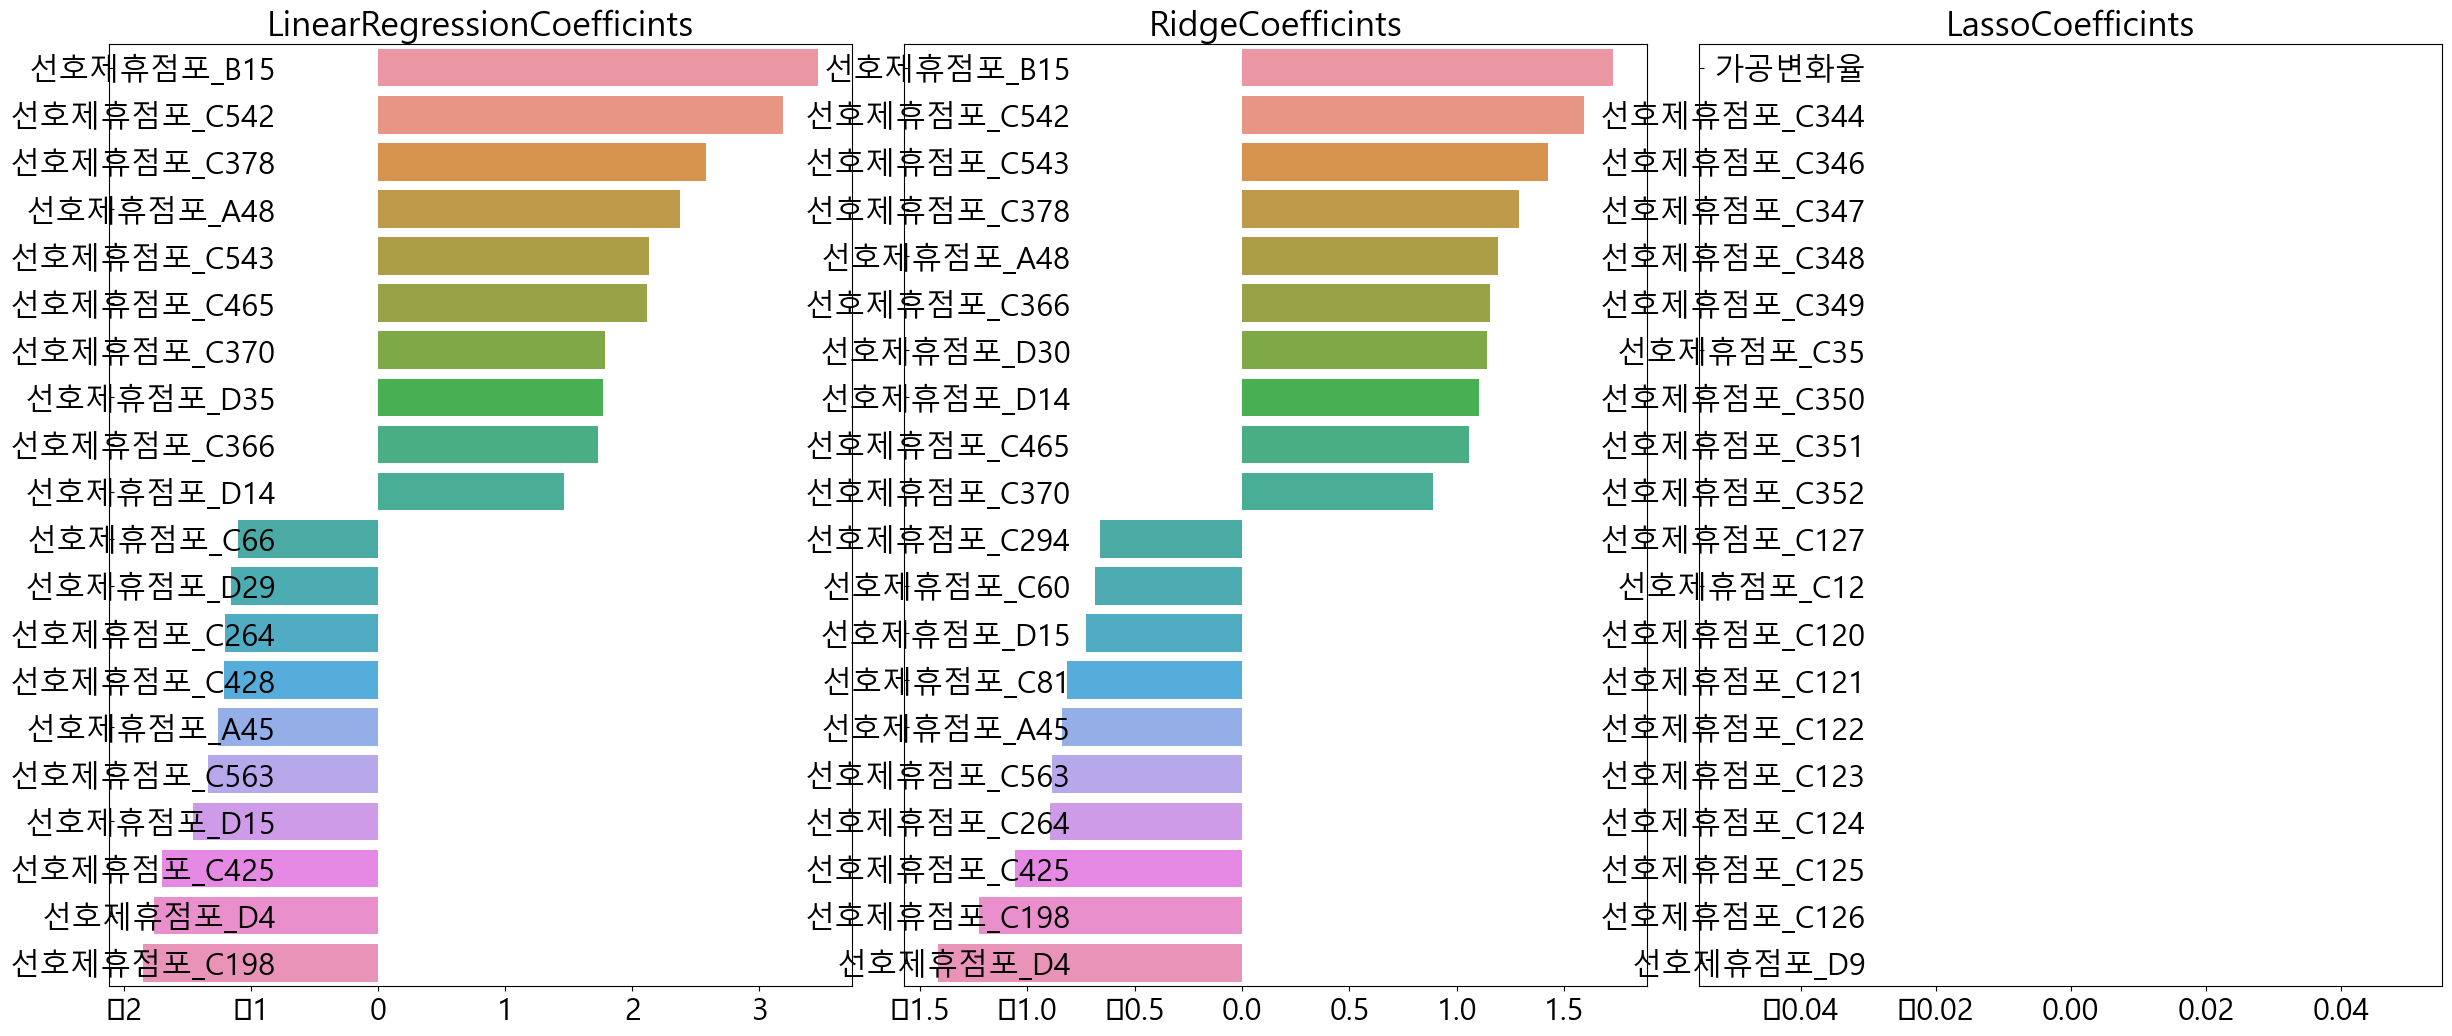

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc("font", family = "Malgun Gothic")
import warnings
warnings.filterwarnings("ignore")


def get_top_bottom_coef(model):
    coef = pd.Series(model.coef_, index = X_train.columns)
    c_h = coef.sort_values(ascending = False).head(10)
    c_l = coef.sort_values(ascending = False).tail(10)
    return c_h, c_l

def visualize_coefficient(models):
    fig,axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        c_h, c_l = get_top_bottom_coef(model)
        coef_concat = pd.concat([c_h, c_l])
        
        axs[i_num].set_title(model.__class__.__name__ + 'Coefficints', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
models = [lr, ridge, lasso]
visualize_coefficient(models)
        

In [24]:
def compare_arrays(arr1, arr2):
    count=0
    for i in range(len(arr1)):
        if arr1[i] ==arr2[i]:
            count += 1
    return count

# 주어진 코드는 두 개의 배열 arr1과 arr2를 비교하여 
# 같은 위치에 같은 값을 가지는 요소의 개수를 세는 함수입니다.

def convert_values(arr): # 변환
    result = []
    for value in arr:
        if value < 85:
            result.append(3)
        elif value <115:
            result.append(2)
        else:
            result.append(1)
    return result

def get_scores(arr1,arr2):
    TP=0
    FP=0
    FN=0
    TN=0
    
    for i in range(len(arr1)):
        if arr2[i] == 3 and arr1[i] ==3:
            TP += 1
        elif arr2[i] == 3 and arr1[i] !=3:
            FN += 1
        elif arr2[i] != 3 and arr1[i] !=3:
            TN += 1
        else:
            FP +=1
    print(f"[{TP}   {FP}]\n[{FN}   {TN}]")
    print(f"정밀도 : {round(TP/ (FP+TP)*100,2)}%")
    print(f"재현율 : {round(TP/ (FN+TP)*100,2)}%")
    print(f"정확도 : {round((TP+TN)/len(arr1)*100,2)}%")
        

In [25]:
pre = np.expm1(ridge.predict(X_test))
real = np.array(np.expm1(y_test))
pre_cat = convert_values(pre)
real_cat = convert_values(real)
matching_count = compare_arrays(pre_cat,real_cat)
print(matching_count)
round(matching_count/len(pre)*100,2)

7577


40.16

In [26]:
get_scores(pre_cat, real_cat)

[2211   2445]
[4639   9571]
정밀도 : 47.49%
재현율 : 32.28%
정확도 : 62.45%
